In [1]:
import sys
from tqdm import tqdm

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.term_generation import gen_filtered_lambda_terms
from calculus_path_mod.json_serialization import load_terms

Lambda = Abstraction
App = Application

# Load terms from file

In [2]:
terms = load_terms("terms_210_filtered_RI.dat")

# Run Experiments

In [8]:
n_strategy = RIStrategy()
steps_RI = [term.normalize(n_strategy) for term in tqdm(terms)]

100%|██████████| 223/223 [00:00<00:00, 372.20it/s]


In [4]:
n_strategy = RandomOuterStrategy(prob_norm="softmax")
steps_RandOut_soft = [term.normalize(n_strategy) for term in tqdm(terms)]

100%|██████████| 223/223 [00:26<00:00,  8.53it/s] 


In [5]:
n_strategy = RandomOuterStrategy(prob_norm="sum")
steps_RandOut_sum = [term.normalize(n_strategy) for term in tqdm(terms)]

100%|██████████| 223/223 [00:11<00:00, 19.75it/s]


In [6]:
n_strategy = RandomInnerStrategy(prob_norm="softmax")
steps_RandIn_soft = [term.normalize(n_strategy) for term in tqdm(terms)]

100%|██████████| 223/223 [00:01<00:00, 194.08it/s]


In [7]:
n_strategy = RandomInnerStrategy(prob_norm="sum")
steps_RandIn_sum = [term.normalize(n_strategy) for term in tqdm(terms)]

100%|██████████| 223/223 [00:06<00:00, 36.10it/s] 


In [9]:
steps_RI = [dt[1] for dt in steps_RI]
steps_RandOut_soft = [dt[1] for dt in steps_RandOut_soft]
steps_RandOut_sum = [dt[1] for dt in steps_RandOut_sum]

steps_RandIn_soft = [dt[1] for dt in steps_RandIn_soft]
steps_RandIn_sum = [dt[1] for dt in steps_RandIn_sum]

# Compare Results

In [10]:
from calculus_utils.outliers_cleaning import clear_arr
from calculus_utils.drawing import *

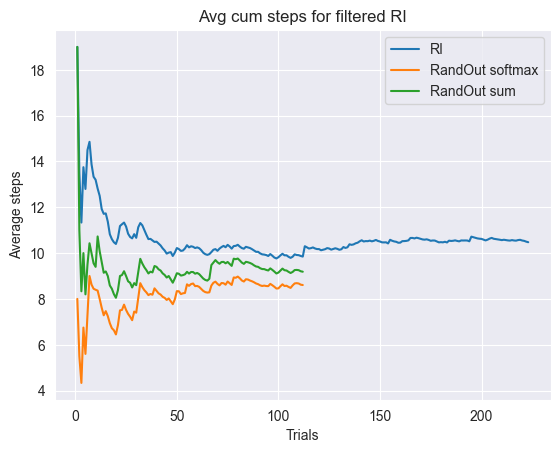

In [11]:
comp_data = {
    "RI": (steps_RI, "-"),
    "RandOut softmax": (steps_RandOut_soft, "-"),
    "RandOut sum": (steps_RandOut_sum, "-")
}

draw_cumulative_avg_comparison(comp_data, title="Avg cum steps for filtered RI")

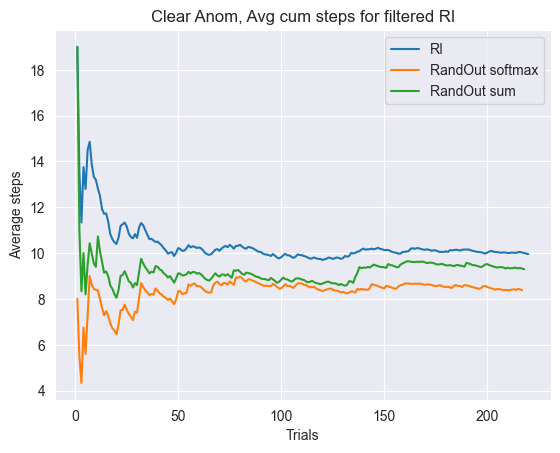

In [15]:
comp_data = {
    "RI": (clear_arr(steps_RI), "-"),
    "RandOut softmax": (clear_arr(steps_RandOut_soft), "-"),
    "RandOut sum": (clear_arr(steps_RandOut_sum), "-")
}

draw_cumulative_avg_comparison(comp_data, title="Clear Anom, Avg cum steps for filtered RI")

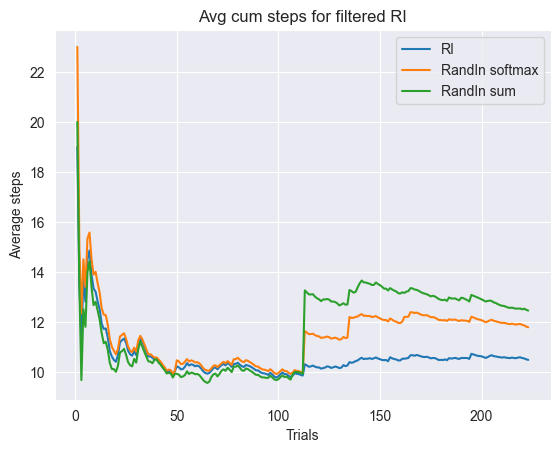

In [13]:
comp_data = {
    "RI": (steps_RI, "-"),
    "RandIn softmax": (steps_RandIn_soft, "-"),
    "RandIn sum": (steps_RandIn_sum, "-")
}

draw_cumulative_avg_comparison(comp_data, title="Avg cum steps for filtered RI")

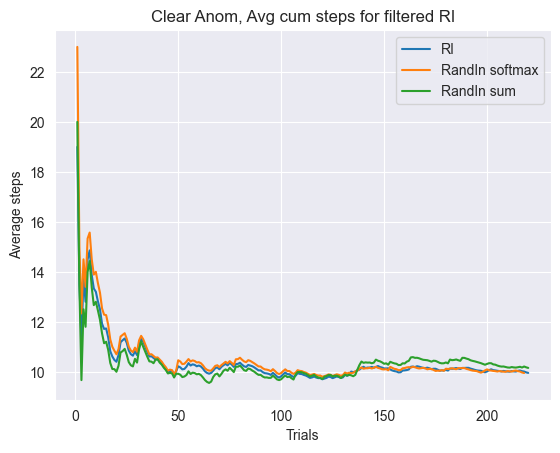

In [16]:
comp_data = {
    "RI": (clear_arr(steps_RI), "-"),
    "RandIn softmax": (clear_arr(steps_RandIn_soft), "-"),
    "RandIn sum": (clear_arr(steps_RandIn_sum), "-")
}

draw_cumulative_avg_comparison(comp_data, title="Clear Anom, Avg cum steps for filtered RI")

# Get Expected Values

In [17]:
def get_expected_steps(steps):
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    return result

In [18]:
expected_RI = get_expected_steps(steps_RI)
expected_RandOut_soft = get_expected_steps(steps_RandOut_soft)
expected_RandOut_sum = get_expected_steps(steps_RandOut_sum)
expected_RandIn_soft = get_expected_steps(steps_RandIn_soft)
expected_RandIn_sum = get_expected_steps(steps_RandIn_sum)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.09it/s]


In [19]:
print(f"RI expected: {expected_RI}")
print(f"RandOut soft expected: {expected_RandOut_soft}")
print(f"RandOut sum expected: {expected_RandOut_sum}")
print(f"RandIn soft expected: {expected_RandIn_soft}")
print(f"RandIn sum expected: {expected_RandIn_sum}")

RI expected: 10.46004658948474
RandOut soft expected: 9.541505203577644
RandOut sum expected: 10.299352502531857
RandIn soft expected: 11.084943907510327
RandIn sum expected: 11.225365741893844
